In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision
import torch.nn as nn

In [ ]:
! unzip /content/drive/MyDrive/deeplearning/Cats\&Dogs.zip

In [4]:
path_train = "/content/drive/MyDrive/deeplearning/dataset/training_set"
path_test = "/content/drive/MyDrive/deeplearning/dataset/test_set"

In [5]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor()
])
train = torchvision.datasets.ImageFolder(root=path_train,transform=transform)
test = torchvision.datasets.ImageFolder(root=path_test,transform=transform)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train,batch_size=32,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test,batch_size=32,shuffle=True)

In [7]:
iter_loader = iter(train_loader)
images,label = next(iter_loader)

torch.Size([3, 224, 224])
tensor(0)


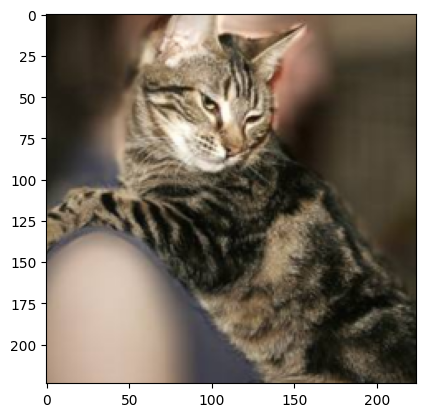

In [9]:
print(images[0].shape)
plt.imshow(images[14].permute(1,2,0).numpy())
print(label[14])

In [10]:
class mlp(nn.Module):
  def __init__(self,input_shape):
    super(mlp,self).__init__()
    self.input_shape = input_shape

    self.l1 = nn.Linear(self.input_shape,20000)
    self.act1 = nn.ReLU()
    self.l2 = nn.Linear(20000,200)
    self.act2 = nn.ReLU()
    self.l3 = nn.Linear(200,2)
    self.act4 = nn.Softmax()

  def forward(self,x):
    x = self.l1(x)
    x =  self.act1(x)
    x = self.l2(x)
    x = self.act2(x)
    x = self.l3(x)
    x = self.act4(x)
    return x

In [ ]:
model = mlp(3*224*224)
print(model)

loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)
for epoch in range(5):
  for i,(images,labels) in enumerate(train_loader):
    images = images.reshape(-1,3*128*128).to("cpu")
    labels = labels.to("cpu")
    output = model(images)
    print(output.shape)
    output = output.view(output.size(0),-1)
    print(output.shape)
    print(images.shape)
    print(labels.shape)

    ls = loss(output,labels)
    optim.zero_grad()
    ls.backward()
    optim.step()
    print(f"Epochs {epoch}, iter: {(i+1)/len(train_loader)}, loss: {ls.item()}")


# CNN:

In [11]:
class convnet(nn.Module):
  def __init__(self,input_shape):
    super(convnet,self).__init__()
    self.input_shape = input_shape
    self.conv1 = nn.Conv2d(in_channels=input_shape,out_channels=32,kernel_size=(3,3),stride=1,padding=1)
    self.act1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3),stride=1,padding=1)
    self.act2 = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=(2,2))
    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(112*112*32,500)
    self.act3 = nn.ReLU()
    self.fc2 = nn.Linear(500,2)

  def forward(self,x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool(x)
    x = self.flat(x)
    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    return x

In [12]:
model = convnet(3)
model = model.to("cpu")

In [ ]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)
for epoch in range(3):
  for i, (images,labels) in enumerate(train_loader):
    images = images.to("cpu")
    labels = labels.to("cpu")
  #  print("images shape: ", images.shape)
    output = model(images)
    #print("output shape: ", output.shape)
   # print("labels shape: ",labels.shape)
    ls = loss(output,labels)
    optim.zero_grad()
    ls.backward()
    optim.step()
    print(f'Epoch: {epoch}, iter: {i+1}/{len(train_loader)} loss: {ls.item()}')

# ALex net:

In [13]:
from torchvision.models import alexnet
from torchvision.models import AlexNet_Weights

In [14]:
model = alexnet(weights=AlexNet_Weights)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 145MB/s]


In [15]:
classifier = model.classifier

In [16]:
classifier[6] = nn.Linear(classifier[6].in_features,2)

In [17]:
model.classifier = classifier

In [18]:
from torchsummary import summary
summary(model,(3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]          23,296
              ReLU-2           [-1, 64, 56, 56]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)
for epoch in range(3):
  for i, (images,labels) in enumerate(train_loader):
    images = images.to("cpu")
    labels = labels.to("cpu")
  #  print("images shape: ", images.shape)
    output = model(images)
    #print("output shape: ", output.shape)
   # print("labels shape: ",labels.shape)
    ls = loss(output,labels)
    optim.zero_grad()
    ls.backward()
    optim.step()
    print(f'Epoch: {epoch}, iter: {i+1}/{len(train_loader)} loss: {ls.item()}')